<a href="https://colab.research.google.com/github/Godwill-Kipchirchir/assessment1/blob/main/assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***

Welcome to my first python notebook.

This notebook provides clear quide of a program that analyses text input from users, calculating statistics and creating visualisations of the results.

**Function 1: get_user_input()**

To ask for a block of text I will use pyinputplus


In [ ]:
#start by installing pyinputplus
!pip install pyinputplus

After installing the pyinputplus, I'll proceed to getting users input.

In [ ]:

#get users input
import pyinputplus as pyip
def get_user_input():
    print("\n📝 Please enter your text below.")
    print("(Press Enter twice to finish):")

    lines = []
    while True:
        line = input()
        if line.strip() == "":
            if lines:
                break
            else:
                print("Please enter at least one line of text.")
        else:
            lines.append(line.strip())

    return " ".join(lines)
#output
text = get_user_input()
print("\n—you entered—\n")
print(text)


# **Function 2: clean_text(text)**

This removes punctuations and normalizes the case.

In [ ]:
# import re in Python is used to bring in the Regular Expressions (regex)
# module, which lets you search, match, and manipulate strings using patterns.

import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    return text

sample = text
cleaned = clean_text(sample)
print("original:",sample)
print("cleaned:",cleaned)

# **Function 3:** calculate_statistics(text)

This calculates basic statisctics from the cleaned text.


In [35]:
def calculate_statistics(cleaned_text):
    words = cleaned_text.split()
    word_count = len(words)

    # Basic sentence count: count '.', '!' or '?' in original text
    # (Assume original text is available, not cleaned one)
    sentence_count = len(re.findall(r'[.!?]', cleaned_text))

    # Calculate average word length
    if word_count > 0:
        avg_word_len = sum(len(word) for word in words) / word_count
    else:
        avg_word_len = 0

    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'average_word_length': round(avg_word_len, 2)
    }


## **Function 4:**   get_word_frequencies(cleaned_text,top_n)

For this to be efficient to the progam or for it to be effective I used ***collections.counter*** to find the most common words.

**Collections.Counter**
*   A subclass of dict designed for counting.
*   Keys are the items you’re counting (e.g., words), and values are the counts.





In [43]:
from collections import Counter

def get_word_frequencies(cleaned_text, top_n=10):
    words = cleaned_text.split()
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)
    return dict(most_common)

# Example usage
sample_text = text
#the input must first be cleaned before getting the word frequency
freqs = get_word_frequencies(sample_text, top_n=3)

print("Top 3 word frequencies:")
for word, count in freqs.items():
    print(f"{word}: {count}")



Top 3 word frequencies:
navigate_next: 3
next: 1
get_user_input(): 1


## **Function 5:**  visualise_frequencies(freq_dict)


This visualises the frequency dictionary using matplotlib.

*   It takes your frequency dictionary—where keys are words and values are counts—and produce a bar chart of the top words.





In [ ]:
!pip install matplotlib

Frequencies: {'navigate_next': 3, 'next': 1, 'get_user_input': 1}


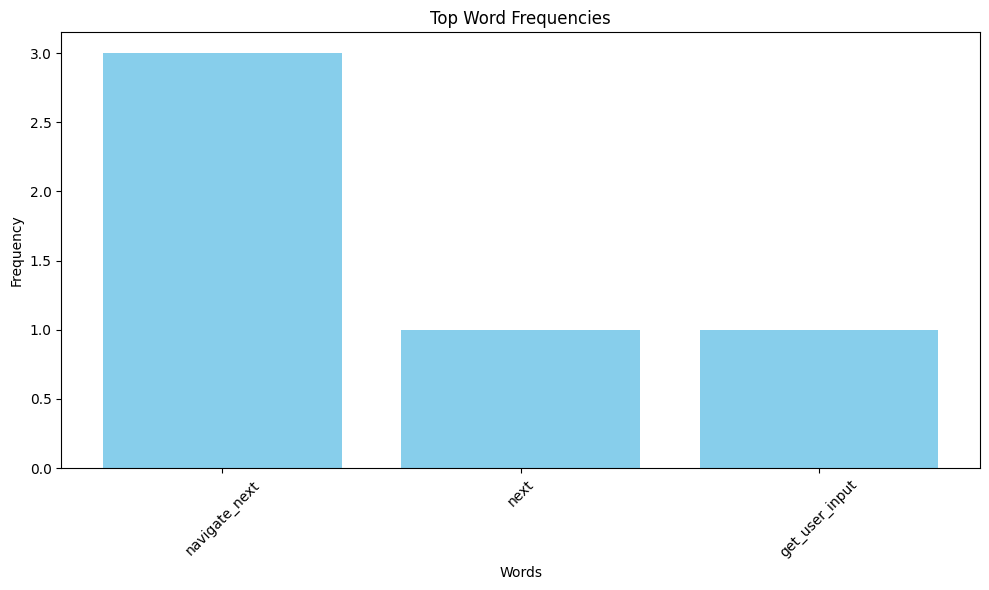

In [45]:
import matplotlib.pyplot as plt

def visualise_frequencies(freq_dict):
    if not freq_dict:
        print("No data to display.")
        return

    words = list(freq_dict.keys())
    counts = list(freq_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top Word Frequencies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


sample = text
cleaned = clean_text(sample)
freq_dict = get_word_frequencies(cleaned, top_n=3)
print("Frequencies:", freq_dict)
visualise_frequencies(freq_dict)